In [3]:
# 导入相应的包
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 生成训练数据集
n_sample = 1000
np.random.seed(666)
x = np.random.randn(n_sample,2)  #随机生成10个数, 作为自变量
w_true = np.array([0.3,0.9])  # 自定义系数W=0.5
z = np.dot(x,w_true)  # 矩阵乘法，等价于w*x+b
y_true = 1.0/(1+np.exp(-z))  # y = 1/（1+exp(-w*x+b)）

Text(0, 0.5, 'y')

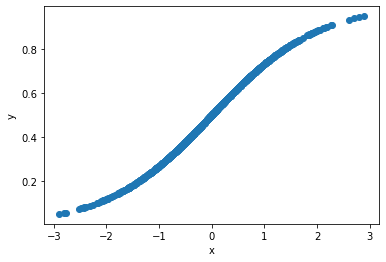

In [9]:
# 查看x和y的关系
plt.scatter(z, y_true)
plt.xlabel("x")
plt.ylabel("y")

In [2]:
# 开始机器学习
alpha = 1 # 学习率，每一步走多远
max_cycles = 100 # 最大循环次数,最多走多少步去山脚下
w_fit = [1,10]  # 初始化回归系数w
z = np.dot(x,w_fit)  # 矩阵乘法，等价于w*x+b
yhat = 1.0/(1+np.exp(-z))   # y = 1/（1+exp(-w*x+b)）

**<font size=5>1,J(w) = (-1/n_sample)*(np.sum((y_true*np.log(yhat)) + ((1-y_true)*(np.log(1-yhat)))))**</font>    
![](./img/loss_logisticregression.png)
---

**<font size=5> 2,J(w)' = (1/n_sample)*(np.dot(x.T, (yhat-y_true).T))**</font>    
![](./img/delta_loss_logisticregression.png)
---

**<font size=5>3,w_fit = w_fit - alpha * delta_loss**</font>  
![](./img/update.png)

In [ ]:
# 迭代100次，走100步看看能否到达山脚下
w_fit_all = []
loss_all = []
for index in range(max_cycles):
    z = np.dot(x,w_fit)  # 矩阵乘法
    yhat = 1.0/(1+np.exp(-z))   # 计算预测的y 
    loss = (-1/n_sample)*(np.sum((y_true*np.log(yhat)) + ((1-y_true)*(np.log(1-yhat)))))  # 损失函数
    delta_loss = (1/n_sample)*(np.dot(x.T, (yhat-y_true).T)) # 当前loss在w上的导数， 即对w求导
    print(f"{index}:loss={loss:.5f}, w_fit={w_fit}")
    w_fit = w_fit - alpha * delta_loss.T  # 更新w_fit

print(f"拟合出的权重为{w_fit}")